# TensorFlow Mathematical Functions
## Comprehensive Guide to Mathematical Operations in TensorFlow

This notebook demonstrates various mathematical operations available in TensorFlow, from basic arithmetic to advanced functions. We'll explore:

1. **Basic Arithmetic Operations**
2. **Trigonometric Functions**
3. **Logarithmic and Exponential Functions**
4. **Matrix Operations**
5. **Statistical Functions**
6. **Advanced Mathematical Functions**
7. **Custom Mathematical Operations**
8. **Performance Comparisons**

Let's start with importing the necessary libraries:

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Print TensorFlow version
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.test.is_gpu_available()}")
print(f"Number of GPUs: {len(tf.config.experimental.list_physical_devices('GPU'))}")

TensorFlow Version: 2.18.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available: False
Number of GPUs: 0


## 1. Basic Arithmetic Operations

TensorFlow provides all standard arithmetic operations that work element-wise on tensors.

In [4]:
# Create sample tensors for basic arithmetic operations
a = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
b = tf.constant([10, 20, 30, 40, 50], dtype=tf.float32)

print("Tensor a:", a.numpy())
print("Tensor b:", b.numpy())
print()

# Basic arithmetic operations
print("=== BASIC ARITHMETIC OPERATIONS ===")
print("Addition (a + b):", tf.add(a, b).numpy())
print("Alternative addition (a + b):", (a + b).numpy())
print()

print("Subtraction (a - b):", tf.subtract(a, b).numpy())
print("Alternative subtraction (a - b):", (a - b).numpy())
print()

print("Multiplication (a * b):", tf.multiply(a, b).numpy())
print("Alternative multiplication (a * b):", (a * b).numpy())
print()

print("Division (a / b):", tf.divide(a, b).numpy())
print("Alternative division (a / b):", (a / b).numpy())
print()

print("Floor Division (a // b):", tf.math.floordiv(a, b).numpy())
print("Modulo (a % b):", tf.math.mod(a, b).numpy())
print()

print("Power (a ** 2):", tf.pow(a, 2).numpy())
print("Square root:", tf.sqrt(a).numpy())
print("Absolute value:", tf.abs(tf.constant([-1, -2, 3, -4])).numpy())

Tensor a: [1. 2. 3. 4. 5.]
Tensor b: [10. 20. 30. 40. 50.]

=== BASIC ARITHMETIC OPERATIONS ===
Addition (a + b): [11. 22. 33. 44. 55.]
Alternative addition (a + b): [11. 22. 33. 44. 55.]

Subtraction (a - b): [ -9. -18. -27. -36. -45.]
Alternative subtraction (a - b): [ -9. -18. -27. -36. -45.]

Multiplication (a * b): [ 10.  40.  90. 160. 250.]
Alternative multiplication (a * b): [ 10.  40.  90. 160. 250.]

Division (a / b): [0.1 0.1 0.1 0.1 0.1]
Alternative division (a / b): [0.1 0.1 0.1 0.1 0.1]

Floor Division (a // b): [0. 0. 0. 0. 0.]
Modulo (a % b): [1. 2. 3. 4. 5.]

Power (a ** 2): [ 1.  4.  9. 16. 25.]
Square root: [1.        1.4142135 1.7320508 2.        2.236068 ]
Absolute value: [1 2 3 4]


### Broadcasting in Arithmetic Operations

TensorFlow automatically broadcasts tensors of different shapes when performing arithmetic operations, following NumPy broadcasting rules.

In [5]:
# Broadcasting examples
print("=== BROADCASTING EXAMPLES ===")

# Scalar and tensor
scalar = tf.constant(5.0)
tensor_1d = tf.constant([1.0, 2.0, 3.0])
print("Scalar:", scalar.numpy())
print("1D Tensor:", tensor_1d.numpy())
print("Scalar + 1D Tensor:", (scalar + tensor_1d).numpy())
print()

# Different shaped tensors
tensor_2x3 = tf.constant([[1.0, 2.0, 3.0], 
                          [4.0, 5.0, 6.0]])
tensor_1x3 = tf.constant([[10.0, 20.0, 30.0]])
print("2x3 Tensor:\n", tensor_2x3.numpy())
print("1x3 Tensor:", tensor_1x3.numpy())
print("2x3 + 1x3 Tensor:\n", (tensor_2x3 + tensor_1x3).numpy())
print()

# Column vector broadcasting
column_vector = tf.constant([[100.0], [200.0]])
print("Column vector (2x1):\n", column_vector.numpy())
print("2x3 + 2x1 Tensor:\n", (tensor_2x3 + column_vector).numpy())

=== BROADCASTING EXAMPLES ===
Scalar: 5.0
1D Tensor: [1. 2. 3.]
Scalar + 1D Tensor: [6. 7. 8.]

2x3 Tensor:
 [[1. 2. 3.]
 [4. 5. 6.]]
1x3 Tensor: [[10. 20. 30.]]
2x3 + 1x3 Tensor:
 [[11. 22. 33.]
 [14. 25. 36.]]

Column vector (2x1):
 [[100.]
 [200.]]
2x3 + 2x1 Tensor:
 [[101. 102. 103.]
 [204. 205. 206.]]


## 2. Trigonometric Functions

TensorFlow provides all standard trigonometric functions, which are essential for signal processing, computer graphics, and many ML applications.

Angles (radians): [0.        0.8975979 1.7951958 2.6927938 3.5903916 4.4879894 5.3855877
 6.2831855]
Angles (degrees): [  0.       51.42857 102.85714 154.28572 205.71428 257.14285 308.57144
 360.     ]

=== TRIGONOMETRIC FUNCTIONS ===
sin(angles): [ 0.0000000e+00  7.8183150e-01  9.7492790e-01  4.3388361e-01
 -4.3388376e-01 -9.7492790e-01 -7.8183132e-01  1.7484555e-07]
cos(angles): [ 1.          0.6234898  -0.22252095 -0.9009689  -0.90096885 -0.222521
  0.62349004  1.        ]
tan(angles): [ 0.0000000e+00  1.2539604e+00 -4.3812861e+00 -4.8157445e-01
  4.8157465e-01  4.3812847e+00 -1.2539597e+00  1.7484555e-07]

Values: [0.    0.5   0.707 0.866 1.   ]
arcsin(values): [0.        0.5235988 0.7852472 1.0471468 1.5707964]
arccos(values): [1.5707964  1.0471976  0.78554916 0.5236496  0.        ]
arctan(values): [0.         0.4636476  0.61540854 0.71370983 0.7853982 ]

=== HYPERBOLIC FUNCTIONS ===
x: [0. 1. 2. 3.]
sinh(x): [ 0.         1.1752012  3.6268604 10.017875 ]
cosh(x): [ 1.         1.54

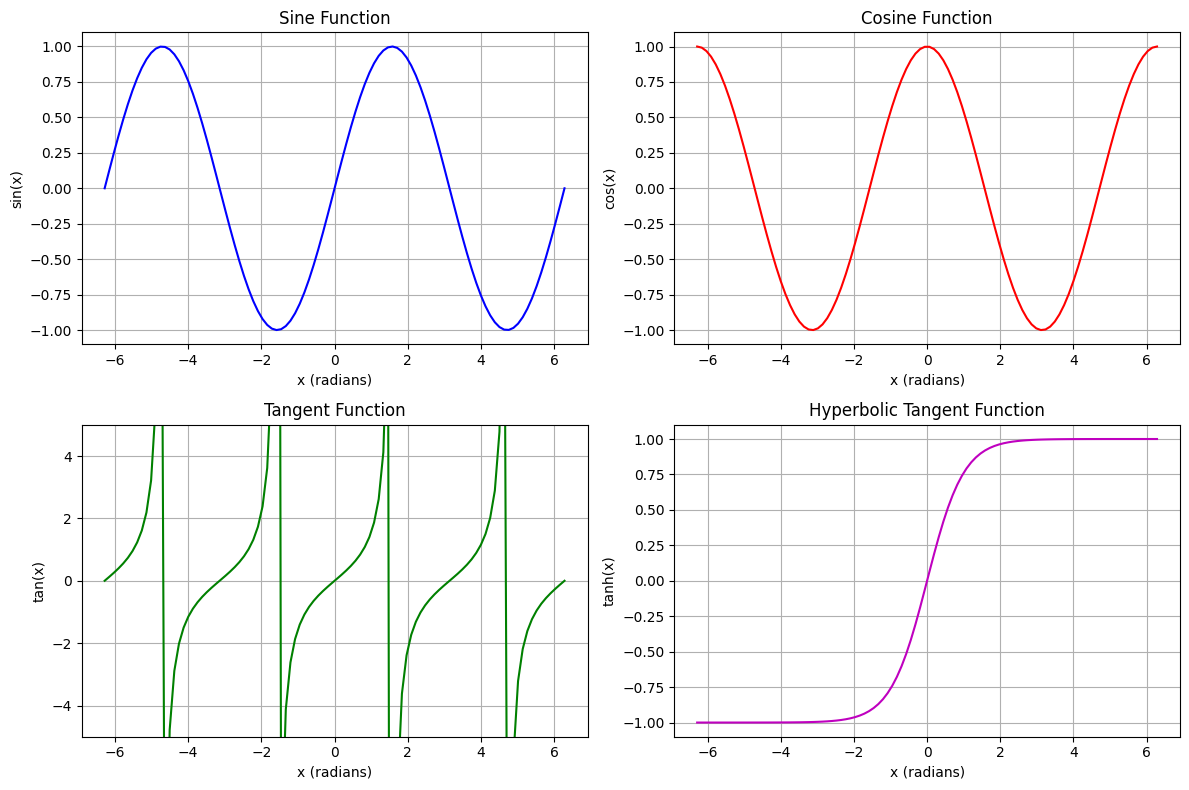

In [6]:
# Trigonometric functions
angles = tf.linspace(0.0, 2*np.pi, 8)
print("Angles (radians):", angles.numpy())
print("Angles (degrees):", (angles * 180 / np.pi).numpy())
print()

print("=== TRIGONOMETRIC FUNCTIONS ===")
print("sin(angles):", tf.sin(angles).numpy())
print("cos(angles):", tf.cos(angles).numpy())
print("tan(angles):", tf.tan(angles).numpy())
print()

# Inverse trigonometric functions
values = tf.constant([0.0, 0.5, 0.707, 0.866, 1.0])
print("Values:", values.numpy())
print("arcsin(values):", tf.asin(values).numpy())
print("arccos(values):", tf.acos(values).numpy())
print("arctan(values):", tf.atan(values).numpy())
print()

# Hyperbolic functions
print("=== HYPERBOLIC FUNCTIONS ===")
x = tf.constant([0.0, 1.0, 2.0, 3.0])
print("x:", x.numpy())
print("sinh(x):", tf.sinh(x).numpy())
print("cosh(x):", tf.cosh(x).numpy())
print("tanh(x):", tf.tanh(x).numpy())

# Visualizing trigonometric functions
plt.figure(figsize=(12, 8))

# Create more detailed angle range for plotting
x_plot = tf.linspace(-2*np.pi, 2*np.pi, 100)

plt.subplot(2, 2, 1)
plt.plot(x_plot.numpy(), tf.sin(x_plot).numpy(), 'b-', label='sin(x)')
plt.title('Sine Function')
plt.grid(True)
plt.xlabel('x (radians)')
plt.ylabel('sin(x)')

plt.subplot(2, 2, 2)
plt.plot(x_plot.numpy(), tf.cos(x_plot).numpy(), 'r-', label='cos(x)')
plt.title('Cosine Function')
plt.grid(True)
plt.xlabel('x (radians)')
plt.ylabel('cos(x)')

plt.subplot(2, 2, 3)
plt.plot(x_plot.numpy(), tf.tan(x_plot).numpy(), 'g-', label='tan(x)')
plt.title('Tangent Function')
plt.grid(True)
plt.xlabel('x (radians)')
plt.ylabel('tan(x)')
plt.ylim(-5, 5)  # Limit y-axis for better visualization

plt.subplot(2, 2, 4)
plt.plot(x_plot.numpy(), tf.tanh(x_plot).numpy(), 'm-', label='tanh(x)')
plt.title('Hyperbolic Tangent Function')
plt.grid(True)
plt.xlabel('x (radians)')
plt.ylabel('tanh(x)')

plt.tight_layout()
plt.show()

## 3. Logarithmic and Exponential Functions

These functions are crucial in machine learning, especially in activation functions, loss functions, and probability calculations.

In [9]:
# Exponential and logarithmic functions
x = tf.constant([0.5, 1.0, 2.0, 3.0, 5.0])
print("x:", x.numpy())
print()

print("=== EXPONENTIAL FUNCTIONS ===")
print("exp(x):", tf.exp(x).numpy())
print("exp2(x) (2^x):", tf.pow(2.0, x).numpy())
print("expm1(x) (exp(x)-1):", (tf.exp(x) - 1).numpy())  # Manual implementation
print()

print("=== LOGARITHMIC FUNCTIONS ===")
print("log(x) (natural log):", tf.math.log(x).numpy())
print("log10(x):", tf.math.log(x).numpy() / tf.math.log(10.0).numpy())  # TF doesn't have log10 directly
print("log2(x):", tf.math.log(x).numpy() / tf.math.log(2.0).numpy())
print("log1p(x) (log(1+x)):", tf.math.log1p(x).numpy())
print()

# Demonstrating numerical stability with log1p and manual expm1
small_values = tf.constant([1e-10, 1e-8, 1e-6, 1e-4])
print("=== NUMERICAL STABILITY DEMONSTRATION ===")
print("Small values:", small_values.numpy())
print("log(1 + x) (unstable):", tf.math.log(1.0 + small_values).numpy())
print("log1p(x) (stable):", tf.math.log1p(small_values).numpy())
print("exp(x) - 1 (for small x):", (tf.exp(small_values) - 1).numpy())
print()

# Softmax function - important in deep learning
def softmax_manual(x):
    """Manual softmax implementation showing exp and log operations"""
    exp_x = tf.exp(x)
    return exp_x / tf.reduce_sum(exp_x, axis=-1, keepdims=True)

def log_softmax_stable(x):
    """Numerically stable log-softmax"""
    return x - tf.reduce_logsumexp(x, axis=-1, keepdims=True)

# Example with softmax
logits = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print("=== SOFTMAX EXAMPLE (Important in Deep Learning) ===")
print("Logits:\n", logits.numpy())
print("Manual Softmax:\n", softmax_manual(logits).numpy())
print("TF Softmax:\n", tf.nn.softmax(logits).numpy())
print("Log-Softmax:\n", log_softmax_stable(logits).numpy())
print("TF Log-Softmax:\n", tf.nn.log_softmax(logits).numpy())

x: [0.5 1.  2.  3.  5. ]

=== EXPONENTIAL FUNCTIONS ===
exp(x): [  1.6487212   2.7182817   7.389056   20.085537  148.41316  ]
exp2(x) (2^x): [ 1.4142135  2.         4.         8.        32.       ]
expm1(x) (exp(x)-1): [  0.6487212   1.7182817   6.389056   19.085537  147.41316  ]

=== LOGARITHMIC FUNCTIONS ===
log(x) (natural log): [-0.6931472  0.         0.6931472  1.0986123  1.609438 ]
log10(x): [-0.30102998  0.          0.30102998  0.47712126  0.69897   ]
log2(x): [-1.         0.         1.         1.5849625  2.321928 ]
log1p(x) (log(1+x)): [0.4054651 0.6931472 1.0986123 1.3862944 1.7917595]

=== NUMERICAL STABILITY DEMONSTRATION ===
Small values: [1.e-10 1.e-08 1.e-06 1.e-04]
log(1 + x) (unstable): [0.00000000e+00 0.00000000e+00 9.53673862e-07 1.00011595e-04]
log1p(x) (stable): [1.000000e-10 1.000000e-08 9.999995e-07 9.999500e-05]
exp(x) - 1 (for small x): [0.00000000e+00 0.00000000e+00 9.53674316e-07 1.00016594e-04]

=== SOFTMAX EXAMPLE (Important in Deep Learning) ===
Logits:
 [[

## 4. Matrix Operations

Linear algebra operations are fundamental to deep learning and scientific computing.

In [10]:
# Matrix operations
print("=== MATRIX OPERATIONS ===")

# Create sample matrices
A = tf.constant([[1.0, 2.0, 3.0], 
                 [4.0, 5.0, 6.0]])
B = tf.constant([[7.0, 8.0], 
                 [9.0, 10.0], 
                 [11.0, 12.0]])
C = tf.constant([[1.0, 2.0], 
                 [3.0, 4.0]])

print("Matrix A (2x3):\n", A.numpy())
print("Matrix B (3x2):\n", B.numpy())
print("Matrix C (2x2):\n", C.numpy())
print()

# Matrix multiplication
print("=== MATRIX MULTIPLICATION ===")
print("A @ B (matrix multiplication):\n", tf.matmul(A, B).numpy())
print("Alternative: A @ B:\n", (A @ B).numpy())
print()

# Element-wise operations vs matrix operations
print("=== ELEMENT-WISE vs MATRIX OPERATIONS ===")
print("C * C (element-wise):\n", (C * C).numpy())
print("C @ C (matrix multiplication):\n", (C @ C).numpy())
print()

# Matrix properties
square_matrix = tf.constant([[2.0, 1.0], 
                            [1.0, 3.0]])
print("Square Matrix:\n", square_matrix.numpy())
print("Transpose:\n", tf.transpose(square_matrix).numpy())
print("Determinant:", tf.linalg.det(square_matrix).numpy())
print("Trace:", tf.linalg.trace(square_matrix).numpy())
print()

# Matrix decompositions
print("=== MATRIX DECOMPOSITIONS ===")
# Eigenvalue decomposition
eigenvals, eigenvecs = tf.linalg.eigh(square_matrix)
print("Eigenvalues:", eigenvals.numpy())
print("Eigenvectors:\n", eigenvecs.numpy())
print()

# SVD (Singular Value Decomposition)
s, u, v = tf.linalg.svd(A)
print("SVD of matrix A:")
print("Singular values:", s.numpy())
print("U matrix shape:", u.shape)
print("V matrix shape:", v.shape)
print()

# Matrix inverse and solving linear systems
print("=== MATRIX INVERSE AND LINEAR SYSTEMS ===")
invertible_matrix = tf.constant([[4.0, 2.0], 
                                [1.0, 3.0]])
print("Invertible Matrix:\n", invertible_matrix.numpy())
print("Inverse:\n", tf.linalg.inv(invertible_matrix).numpy())

# Verify inverse
identity_check = invertible_matrix @ tf.linalg.inv(invertible_matrix)
print("Matrix * Inverse (should be identity):\n", identity_check.numpy())

# Solving Ax = b
b_vec = tf.constant([[10.0], [8.0]])
x_solution = tf.linalg.solve(invertible_matrix, b_vec)
print("Solving Ax = b:")
print("b:", b_vec.numpy().flatten())
print("Solution x:", x_solution.numpy().flatten())
print("Verification Ax:", (invertible_matrix @ x_solution).numpy().flatten())

=== MATRIX OPERATIONS ===
Matrix A (2x3):
 [[1. 2. 3.]
 [4. 5. 6.]]
Matrix B (3x2):
 [[ 7.  8.]
 [ 9. 10.]
 [11. 12.]]
Matrix C (2x2):
 [[1. 2.]
 [3. 4.]]

=== MATRIX MULTIPLICATION ===
A @ B (matrix multiplication):
 [[ 58.  64.]
 [139. 154.]]
Alternative: A @ B:
 [[ 58.  64.]
 [139. 154.]]

=== ELEMENT-WISE vs MATRIX OPERATIONS ===
C * C (element-wise):
 [[ 1.  4.]
 [ 9. 16.]]
C @ C (matrix multiplication):
 [[ 7. 10.]
 [15. 22.]]

Square Matrix:
 [[2. 1.]
 [1. 3.]]
Transpose:
 [[2. 1.]
 [1. 3.]]
Determinant: 5.0
Trace: 5.0

=== MATRIX DECOMPOSITIONS ===
Eigenvalues: [1.3819659 3.6180334]
Eigenvectors:
 [[-0.8506507  -0.52573115]
 [ 0.52573115 -0.8506507 ]]

SVD of matrix A:
Singular values: [9.508034   0.77286935]
U matrix shape: (2, 2)
V matrix shape: (3, 2)

=== MATRIX INVERSE AND LINEAR SYSTEMS ===
Invertible Matrix:
 [[4. 2.]
 [1. 3.]]
Inverse:
 [[ 0.3 -0.2]
 [-0.1  0.4]]
Matrix * Inverse (should be identity):
 [[1. 0.]
 [0. 1.]]
Solving Ax = b:
b: [10.  8.]
Solution x: [1.4 2.2

## 5. Statistical Functions

Statistical operations are essential for data analysis, machine learning metrics, and understanding data distributions.

In [11]:
# Statistical functions
print("=== STATISTICAL FUNCTIONS ===")

# Create sample data
data = tf.random.normal([100, 5], mean=5.0, stddev=2.0)
print("Data shape:", data.shape)
print("First 5 rows:\n", data[:5].numpy())
print()

# Basic statistics
print("=== DESCRIPTIVE STATISTICS ===")
print("Mean (all elements):", tf.reduce_mean(data).numpy())
print("Mean along axis 0 (column means):", tf.reduce_mean(data, axis=0).numpy())
print("Mean along axis 1 (row means, first 5):", tf.reduce_mean(data, axis=1)[:5].numpy())
print()

print("Standard deviation:", tf.math.reduce_std(data).numpy())
print("Variance:", tf.math.reduce_variance(data).numpy())
print()

print("Minimum value:", tf.reduce_min(data).numpy())
print("Maximum value:", tf.reduce_max(data).numpy())
print("Sum:", tf.reduce_sum(data).numpy())
print("Product (first row):", tf.reduce_prod(data[0]).numpy())
print()

# Quantiles using sorting
print("=== QUANTILES (Manual Implementation) ===")
flattened_data = tf.reshape(data, [-1])
sorted_data = tf.sort(flattened_data)
n = tf.size(sorted_data)

# Calculate percentiles manually
def get_percentile(sorted_tensor, percentile):
    n = tf.size(sorted_tensor)
    index = tf.cast(percentile * tf.cast(n-1, tf.float32) / 100.0, tf.int32)
    return sorted_tensor[index]

percentiles = [0, 25, 50, 75, 100]
for p in percentiles:
    value = get_percentile(sorted_data, p)
    print(f"{p}th percentile: {value.numpy():.2f}")
print()

# Advanced statistical functions
print("=== ADVANCED STATISTICS ===")

# Manual covariance calculation
mean_cols = tf.reduce_mean(data, axis=0, keepdims=True)
centered_data = data - mean_cols
cov_matrix = tf.matmul(centered_data, centered_data, transpose_a=True) / tf.cast(tf.shape(data)[0] - 1, tf.float32)
print("Covariance matrix shape:", cov_matrix.shape)
print("Covariance matrix:\n", cov_matrix.numpy())
print()

# Correlation matrix from covariance
std_devs = tf.sqrt(tf.linalg.diag_part(cov_matrix))
std_matrix = tf.tensordot(std_devs, std_devs, axes=0)
corr_matrix = cov_matrix / std_matrix
print("Correlation matrix:\n", corr_matrix.numpy())
print()

# Moments
print("=== MOMENTS ===")
print("Mean (1st moment):", tf.reduce_mean(data).numpy())
print("Variance (2nd central moment):", tf.math.reduce_variance(data).numpy())

# Skewness (3rd moment)
centered = data - tf.reduce_mean(data)
third_moment = tf.reduce_mean(tf.pow(centered, 3))
skewness = third_moment / tf.pow(tf.math.reduce_std(data), 3)
print("Skewness (3rd moment):", skewness.numpy())

# Kurtosis (4th moment)
fourth_moment = tf.reduce_mean(tf.pow(centered, 4))
kurtosis = fourth_moment / tf.pow(tf.math.reduce_variance(data), 2) - 3  # Excess kurtosis
print("Kurtosis (4th moment):", kurtosis.numpy())

# Histogram-like functionality
print("\n=== HISTOGRAM ANALYSIS ===")
# Create bins and count values
min_val = tf.reduce_min(flattened_data)
max_val = tf.reduce_max(flattened_data)
print(f"Data range: [{min_val.numpy():.2f}, {max_val.numpy():.2f}]")

# Simple binning
bins = tf.linspace(min_val, max_val, 11)  # 10 bins
print("Bin edges:", bins.numpy())

=== STATISTICAL FUNCTIONS ===
Data shape: (100, 5)
First 5 rows:
 [[2.2053604 6.588006  4.5283327 3.3581686 3.0063472]
 [3.7469835 5.7715573 4.520804  3.8065925 4.128821 ]
 [5.679166  5.752894  2.293528  0.9695921 5.9259424]
 [2.4195945 5.964551  1.7088914 4.151958  5.9332285]
 [6.5534563 5.004555  5.736112  4.921171  7.010249 ]]

=== DESCRIPTIVE STATISTICS ===
Mean (all elements): 4.9493794
Mean along axis 0 (column means): [4.747337  5.2439327 4.959154  4.9650555 4.831418 ]
Mean along axis 1 (row means, first 5): [3.937243  4.394952  4.1242247 4.0356445 5.845109 ]

Standard deviation: 2.0351655
Variance: 4.1418986

Minimum value: -0.7718768
Maximum value: 10.184254
Sum: 2474.6897
Product (first row): 664.2224

=== QUANTILES (Manual Implementation) ===
0th percentile: -0.77
25th percentile: 3.56
50th percentile: 4.87
75th percentile: 6.34
100th percentile: 10.18

=== ADVANCED STATISTICS ===
Covariance matrix shape: (5, 5)
Covariance matrix:
 [[ 4.0512276e+00 -6.3295700e-02  3.6447692e

## 6. Advanced Mathematical Functions

These functions are commonly used in machine learning, optimization, and signal processing.

=== ADVANCED MATHEMATICAL FUNCTIONS ===
Input values: [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]

=== ACTIVATION FUNCTIONS ===
ReLU: [0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5.]
Sigmoid: [0.00669285 0.01798621 0.04742587 0.11920294 0.2689414  0.5
 0.73105854 0.8807971  0.95257413 0.98201376 0.9933072 ]
Tanh: [-0.99990916 -0.9993292  -0.9950547  -0.9640276  -0.7615942   0.
  0.7615942   0.9640276   0.9950547   0.9993292   0.99990916]
Softplus: [0.00671535 0.01814993 0.04858736 0.126928   0.3132617  0.6931472
 1.3132616  2.126928   3.0485873  4.01815    5.0067153 ]
ELU: [-0.99326205 -0.9816844  -0.95021296 -0.86466473 -0.63212055  0.
  1.          2.          3.          4.          5.        ]
SELU: [-1.7462534 -1.7258986 -1.6705687 -1.5201665 -1.1113307  0.
  1.050701   2.101402   3.152103   4.202804   5.253505 ]
Leaky ReLU: [-0.5 -0.4 -0.3 -0.2 -0.1  0.   1.   2.   3.   4.   5. ]

=== GRADIENT COMPUTATION ===
Function: f(x) = x^2
x = [2.]
f(x) = [4.]
Analytical gradient: [4.]
Numerical gradi

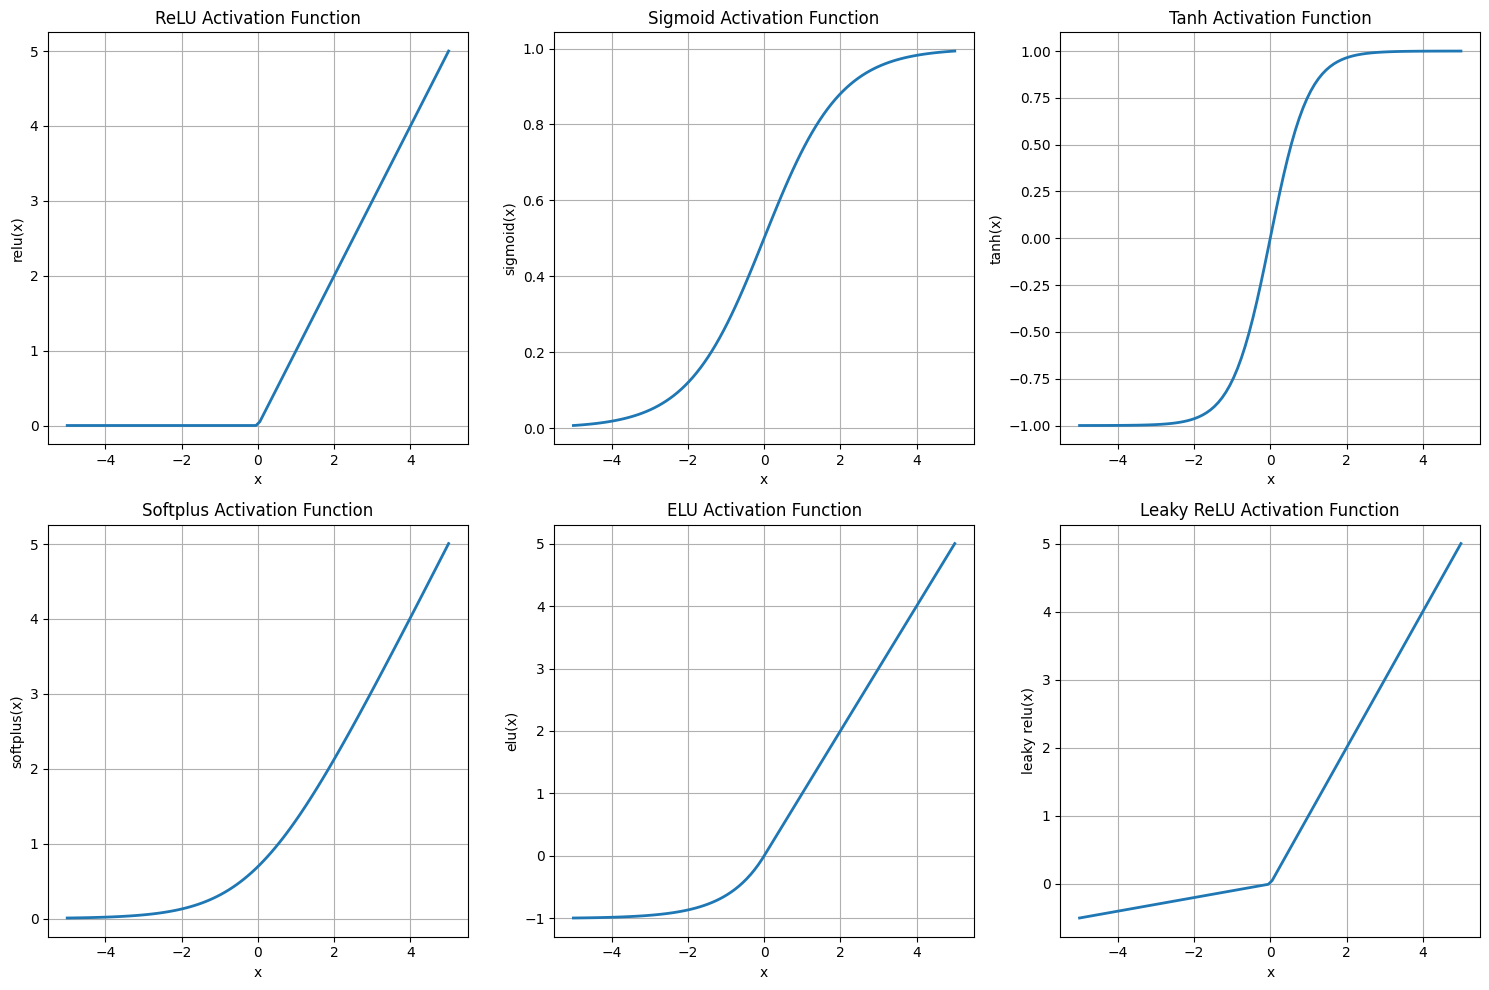

In [13]:
# Advanced mathematical functions
print("=== ADVANCED MATHEMATICAL FUNCTIONS ===")

# Activation functions commonly used in deep learning
x = tf.linspace(-5.0, 5.0, 11)
print("Input values:", x.numpy())
print()

print("=== ACTIVATION FUNCTIONS ===")
print("ReLU:", tf.nn.relu(x).numpy())
print("Sigmoid:", tf.nn.sigmoid(x).numpy())
print("Tanh:", tf.nn.tanh(x).numpy())
print("Softplus:", tf.nn.softplus(x).numpy())
print("ELU:", tf.nn.elu(x).numpy())
print("SELU:", tf.nn.selu(x).numpy())
print("Leaky ReLU:", tf.nn.leaky_relu(x, alpha=0.1).numpy())
print()

# Gradient and derivative approximation
def numerical_gradient(f, x, h=1e-5):
    """Compute numerical gradient using finite differences"""
    return (f(x + h) - f(x - h)) / (2 * h)

# Example: gradient of x^2
def f(x):
    return x ** 2

x_point = tf.constant([2.0])
with tf.GradientTape() as tape:
    tape.watch(x_point)
    y = f(x_point)

grad = tape.gradient(y, x_point)
print("=== GRADIENT COMPUTATION ===")
print(f"Function: f(x) = x^2")
print(f"x = {x_point.numpy()}")
print(f"f(x) = {y.numpy()}")
print(f"Analytical gradient: {grad.numpy()}")
print(f"Numerical gradient: {numerical_gradient(f, x_point).numpy()}")
print()

# Complex mathematical operations
print("=== COMPLEX OPERATIONS ===")

# Gamma function approximation using Stirling's approximation for large numbers
def stirling_gamma(x):
    """Stirling's approximation for gamma function: Γ(x) ≈ √(2π/x) * (x/e)^x"""
    return tf.sqrt(2 * np.pi / x) * tf.pow(x / np.e, x)

large_x = tf.constant([10.0, 20.0, 50.0, 100.0])
print("x:", large_x.numpy())
print("Stirling's Gamma approximation:", stirling_gamma(large_x).numpy())
print()

# Bessel functions approximation (simplified)
def bessel_j0_approx(x):
    """Approximate Bessel function of the first kind, order 0"""
    # Simple approximation for demonstration
    return tf.cos(x) / tf.sqrt(tf.abs(x) + 1e-8)

x_bessel = tf.linspace(0.1, 10.0, 20)
print("Bessel J0 approximation:", bessel_j0_approx(x_bessel).numpy()[:10])
print()

# Error function approximation
def erf_approx(x):
    """Approximation of error function using series"""
    # Simple approximation: erf(x) ≈ tanh(1.2x)
    return tf.nn.tanh(1.2 * x)

x_erf = tf.linspace(-3.0, 3.0, 7)
print("Error function approximation:", erf_approx(x_erf).numpy())
print()

# Special mathematical constants
print("=== MATHEMATICAL CONSTANTS ===")
print("π (pi):", np.pi)
print("e (Euler's number):", np.e)
print("Golden ratio φ:", (1 + tf.sqrt(5.0)) / 2)
print("√2:", tf.sqrt(2.0).numpy())
print("√π:", tf.sqrt(tf.constant(np.pi)).numpy())

# Fibonacci sequence using matrix exponentiation
def fibonacci_matrix(n):
    """Generate Fibonacci number using matrix exponentiation"""
    if n == 0:
        return tf.constant(0.0)  # Return tensor instead of integer
    
    # Fibonacci matrix: [[1, 1], [1, 0]]
    fib_matrix = tf.constant([[1.0, 1.0], [1.0, 0.0]])
    
    # Matrix power
    result = tf.eye(2)
    base = fib_matrix
    n = int(n)
    
    while n > 0:
        if n % 2 == 1:
            result = tf.matmul(result, base)
        base = tf.matmul(base, base)
        n //= 2
    
    return tf.matmul(result, tf.constant([[1.0], [0.0]]))[0, 0]

print("\n=== FIBONACCI SEQUENCE ===")
for i in range(10):
    print(f"F({i}) = {fibonacci_matrix(i).numpy():.0f}")
print()

# Visualization of activation functions
plt.figure(figsize=(15, 10))
x_plot = tf.linspace(-5.0, 5.0, 100)

activations = {
    'ReLU': tf.nn.relu,
    'Sigmoid': tf.nn.sigmoid,
    'Tanh': tf.nn.tanh,
    'Softplus': tf.nn.softplus,
    'ELU': tf.nn.elu,
    'Leaky ReLU': lambda x: tf.nn.leaky_relu(x, alpha=0.1)
}

for i, (name, func) in enumerate(activations.items(), 1):
    plt.subplot(2, 3, i)
    plt.plot(x_plot.numpy(), func(x_plot).numpy(), linewidth=2)
    plt.title(f'{name} Activation Function')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel(f'{name.lower()}(x)')

plt.tight_layout()
plt.show()

## 7. Custom Mathematical Operations

Learn how to create custom mathematical functions and operations in TensorFlow.

In [14]:
# Custom mathematical operations
print("=== CUSTOM MATHEMATICAL OPERATIONS ===")

# Custom function using tf.function decorator for performance
@tf.function
def custom_polynomial(x, coefficients):
    """
    Evaluate polynomial: a_n*x^n + a_(n-1)*x^(n-1) + ... + a_1*x + a_0
    """
    result = tf.zeros_like(x)
    for i, coeff in enumerate(coefficients):
        result += coeff * tf.pow(x, len(coefficients) - 1 - i)
    return result

# Test custom polynomial
x = tf.linspace(-2.0, 2.0, 9)
coeffs = [1.0, -2.0, 1.0, 3.0]  # x^3 - 2x^2 + x + 3
poly_result = custom_polynomial(x, coeffs)
print("Polynomial coefficients:", coeffs)
print("x values:", x.numpy())
print("Polynomial values:", poly_result.numpy())
print()

# Custom activation function
@tf.function
def swish(x, beta=1.0):
    """Swish activation function: x * sigmoid(βx)"""
    return x * tf.nn.sigmoid(beta * x)

@tf.function  
def mish(x):
    """Mish activation function: x * tanh(softplus(x))"""
    return x * tf.nn.tanh(tf.nn.softplus(x))

@tf.function
def gelu(x):
    """GELU activation function: 0.5 * x * (1 + tanh(√(2/π) * (x + 0.044715 * x^3)))"""
    return 0.5 * x * (1 + tf.nn.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

# Test custom activation functions
x_activations = tf.linspace(-3.0, 3.0, 7)
print("=== CUSTOM ACTIVATION FUNCTIONS ===")
print("x:", x_activations.numpy())
print("Swish(x):", swish(x_activations).numpy())
print("Mish(x):", mish(x_activations).numpy())
print("GELU(x):", gelu(x_activations).numpy())
print()

# Custom loss function
@tf.function
def huber_loss(y_true, y_pred, delta=1.0):
    """
    Huber loss: smooth combination of MSE and MAE
    L = 0.5 * (y_true - y_pred)^2 for |y_true - y_pred| <= delta
    L = delta * |y_true - y_pred| - 0.5 * delta^2 for |y_true - y_pred| > delta
    """
    error = y_true - y_pred
    abs_error = tf.abs(error)
    
    # Condition for quadratic vs linear region
    quadratic_region = abs_error <= delta
    
    # Quadratic loss
    quadratic_loss = 0.5 * tf.square(error)
    
    # Linear loss  
    linear_loss = delta * abs_error - 0.5 * tf.square(delta)
    
    return tf.where(quadratic_region, quadratic_loss, linear_loss)

# Test custom loss function
y_true = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])
y_pred = tf.constant([1.1, 1.8, 3.5, 3.2, 6.0])
print("=== CUSTOM LOSS FUNCTION (HUBER LOSS) ===")
print("y_true:", y_true.numpy())
print("y_pred:", y_pred.numpy())
print("Huber loss:", huber_loss(y_true, y_pred).numpy())
print("MSE loss:", tf.keras.losses.mse(y_true, y_pred).numpy())
print("MAE loss:", tf.keras.losses.mae(y_true, y_pred).numpy())
print()

# Custom optimization function - gradient descent step
@tf.function
def gradient_descent_step(params, gradients, learning_rate):
    """Custom gradient descent update"""
    return params - learning_rate * gradients

# Custom mathematical series
@tf.function
def taylor_sin(x, n_terms=10):
    """Taylor series approximation of sin(x)"""
    result = tf.zeros_like(x)
    for n in range(n_terms):
        # sin(x) = x - x^3/3! + x^5/5! - x^7/7! + ...
        term_power = 2 * n + 1
        factorial = tf.cast(tf.math.reduce_prod(tf.range(1, term_power + 1)), tf.float32)
        sign = tf.pow(-1.0, tf.cast(n, tf.float32))
        term = sign * tf.pow(x, term_power) / factorial
        result += term
    return result

@tf.function
def taylor_exp(x, n_terms=10):
    """Taylor series approximation of exp(x)"""
    result = tf.zeros_like(x)
    for n in range(n_terms):
        # exp(x) = 1 + x + x^2/2! + x^3/3! + ...
        factorial = tf.cast(tf.math.reduce_prod(tf.range(1, n + 1)) if n > 0 else 1, tf.float32)
        term = tf.pow(x, n) / factorial
        result += term
    return result

# Test Taylor series
x_taylor = tf.constant([0.0, 0.5, 1.0, 1.5])
print("=== TAYLOR SERIES APPROXIMATIONS ===")
print("x:", x_taylor.numpy())
print("Taylor sin(x):", taylor_sin(x_taylor).numpy())
print("True sin(x):", tf.sin(x_taylor).numpy())
print("Taylor exp(x):", taylor_exp(x_taylor).numpy())
print("True exp(x):", tf.exp(x_taylor).numpy())
print()

# Numerical integration using Riemann sums
@tf.function
def riemann_integral(func, a, b, n_steps=1000):
    """Approximate integral using Riemann sums"""
    dx = (b - a) / n_steps
    x_points = tf.linspace(a, b - dx, n_steps)
    y_values = func(x_points)
    return tf.reduce_sum(y_values) * dx

# Test numerical integration
print("=== NUMERICAL INTEGRATION ===")
# Integrate x^2 from 0 to 1 (analytical result = 1/3)
integral_x_squared = riemann_integral(lambda x: x**2, 0.0, 1.0)
print(f"∫₀¹ x² dx ≈ {integral_x_squared.numpy():.6f} (analytical: 0.333333)")

# Integrate sin(x) from 0 to π (analytical result = 2)
integral_sin = riemann_integral(tf.sin, 0.0, np.pi)
print(f"∫₀π sin(x) dx ≈ {integral_sin.numpy():.6f} (analytical: 2.000000)")
print()

# Performance comparison with tf.function
def slow_polynomial(x, coeffs):
    """Non-compiled version"""
    result = tf.zeros_like(x)
    for i, coeff in enumerate(coeffs):
        result += coeff * tf.pow(x, len(coeffs) - 1 - i)
    return result

# Timing comparison
large_x = tf.random.normal([1000])
coeffs = [1.0, -2.0, 1.0, 3.0, -1.0, 0.5]

print("=== PERFORMANCE COMPARISON ===")
# Warm up
_ = custom_polynomial(large_x, coeffs)
_ = slow_polynomial(large_x, coeffs)

# Time compiled version
start_time = time.time()
for _ in range(100):
    _ = custom_polynomial(large_x, coeffs)
compiled_time = time.time() - start_time

# Time non-compiled version
start_time = time.time()
for _ in range(100):
    _ = slow_polynomial(large_x, coeffs)
non_compiled_time = time.time() - start_time

print(f"Compiled (@tf.function): {compiled_time:.4f} seconds")
print(f"Non-compiled: {non_compiled_time:.4f} seconds")
print(f"Speedup: {non_compiled_time / compiled_time:.2f}x")

=== CUSTOM MATHEMATICAL OPERATIONS ===
Polynomial coefficients: [1.0, -2.0, 1.0, 3.0]
x values: [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
Polynomial values: [-15.     -6.375  -1.      1.875   3.      3.125   3.      3.375   5.   ]

=== CUSTOM ACTIVATION FUNCTIONS ===
x: [-3. -2. -1.  0.  1.  2.  3.]
Swish(x): [-0.14227763 -0.23840584 -0.26894143  0.          0.7310586   1.7615942
  2.8577223 ]
Mish(x): [-0.14564736 -0.25250158 -0.30340153  0.          0.8650984   1.943959
  2.986535  ]
GELU(x): [-0.00363752 -0.04540241 -0.158808    0.          0.841192    1.9545976
  2.9963627 ]

=== CUSTOM LOSS FUNCTION (HUBER LOSS) ===
y_true: [1. 2. 3. 4. 5.]
y_pred: [1.1 1.8 3.5 3.2 6. ]
Huber loss: [0.005      0.02000001 0.125      0.31999996 0.5       ]
MSE loss: 0.38799998
MAE loss: 0.52

=== TAYLOR SERIES APPROXIMATIONS ===
x: [0.  0.5 1.  1.5]
Taylor sin(x): [0.         0.47942552 0.84147096 0.99747115]
True sin(x): [0.         0.47942555 0.84147096 0.997495  ]
Taylor exp(x): [1.        1

## 8. Real-World Applications

Let's explore how these mathematical functions are used in practical machine learning scenarios.

=== REAL-WORLD APPLICATIONS ===
=== IMAGE PROCESSING - GAUSSIAN KERNEL ===
5x5 Gaussian kernel (σ=1.0):
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.05963429 0.09832032 0.05963429 0.01330621]
 [0.02193823 0.09832032 0.1621028  0.09832032 0.02193823]
 [0.01330621 0.05963429 0.09832032 0.05963429 0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]

=== ATTENTION MECHANISM ===
Query shape: (1, 4, 8)
Attention weights shape: (1, 4, 4)
Attention weights:
 [[0.30239326 0.11249151 0.29183722 0.29327795]
 [0.06465202 0.24629031 0.558906   0.1301516 ]
 [0.447955   0.08476987 0.04310667 0.4241684 ]
 [0.19779338 0.13166557 0.37123108 0.2993099 ]]

=== PHYSICS SIMULATION - HARMONIC OSCILLATOR ===
Amplitude: 2.0, Frequency: 1.0, Phase: 0.0
Total Energy: 2.0
Max position: 2.000
Max velocity: 2.000

=== FINANCIAL MODELING - BLACK-SCHOLES ===
Stock Price: $100.0
Strike Price: $105.0
Call Option Price: $2.48

=== SIGNAL PROCESSING - DFT ===
Signal length: 

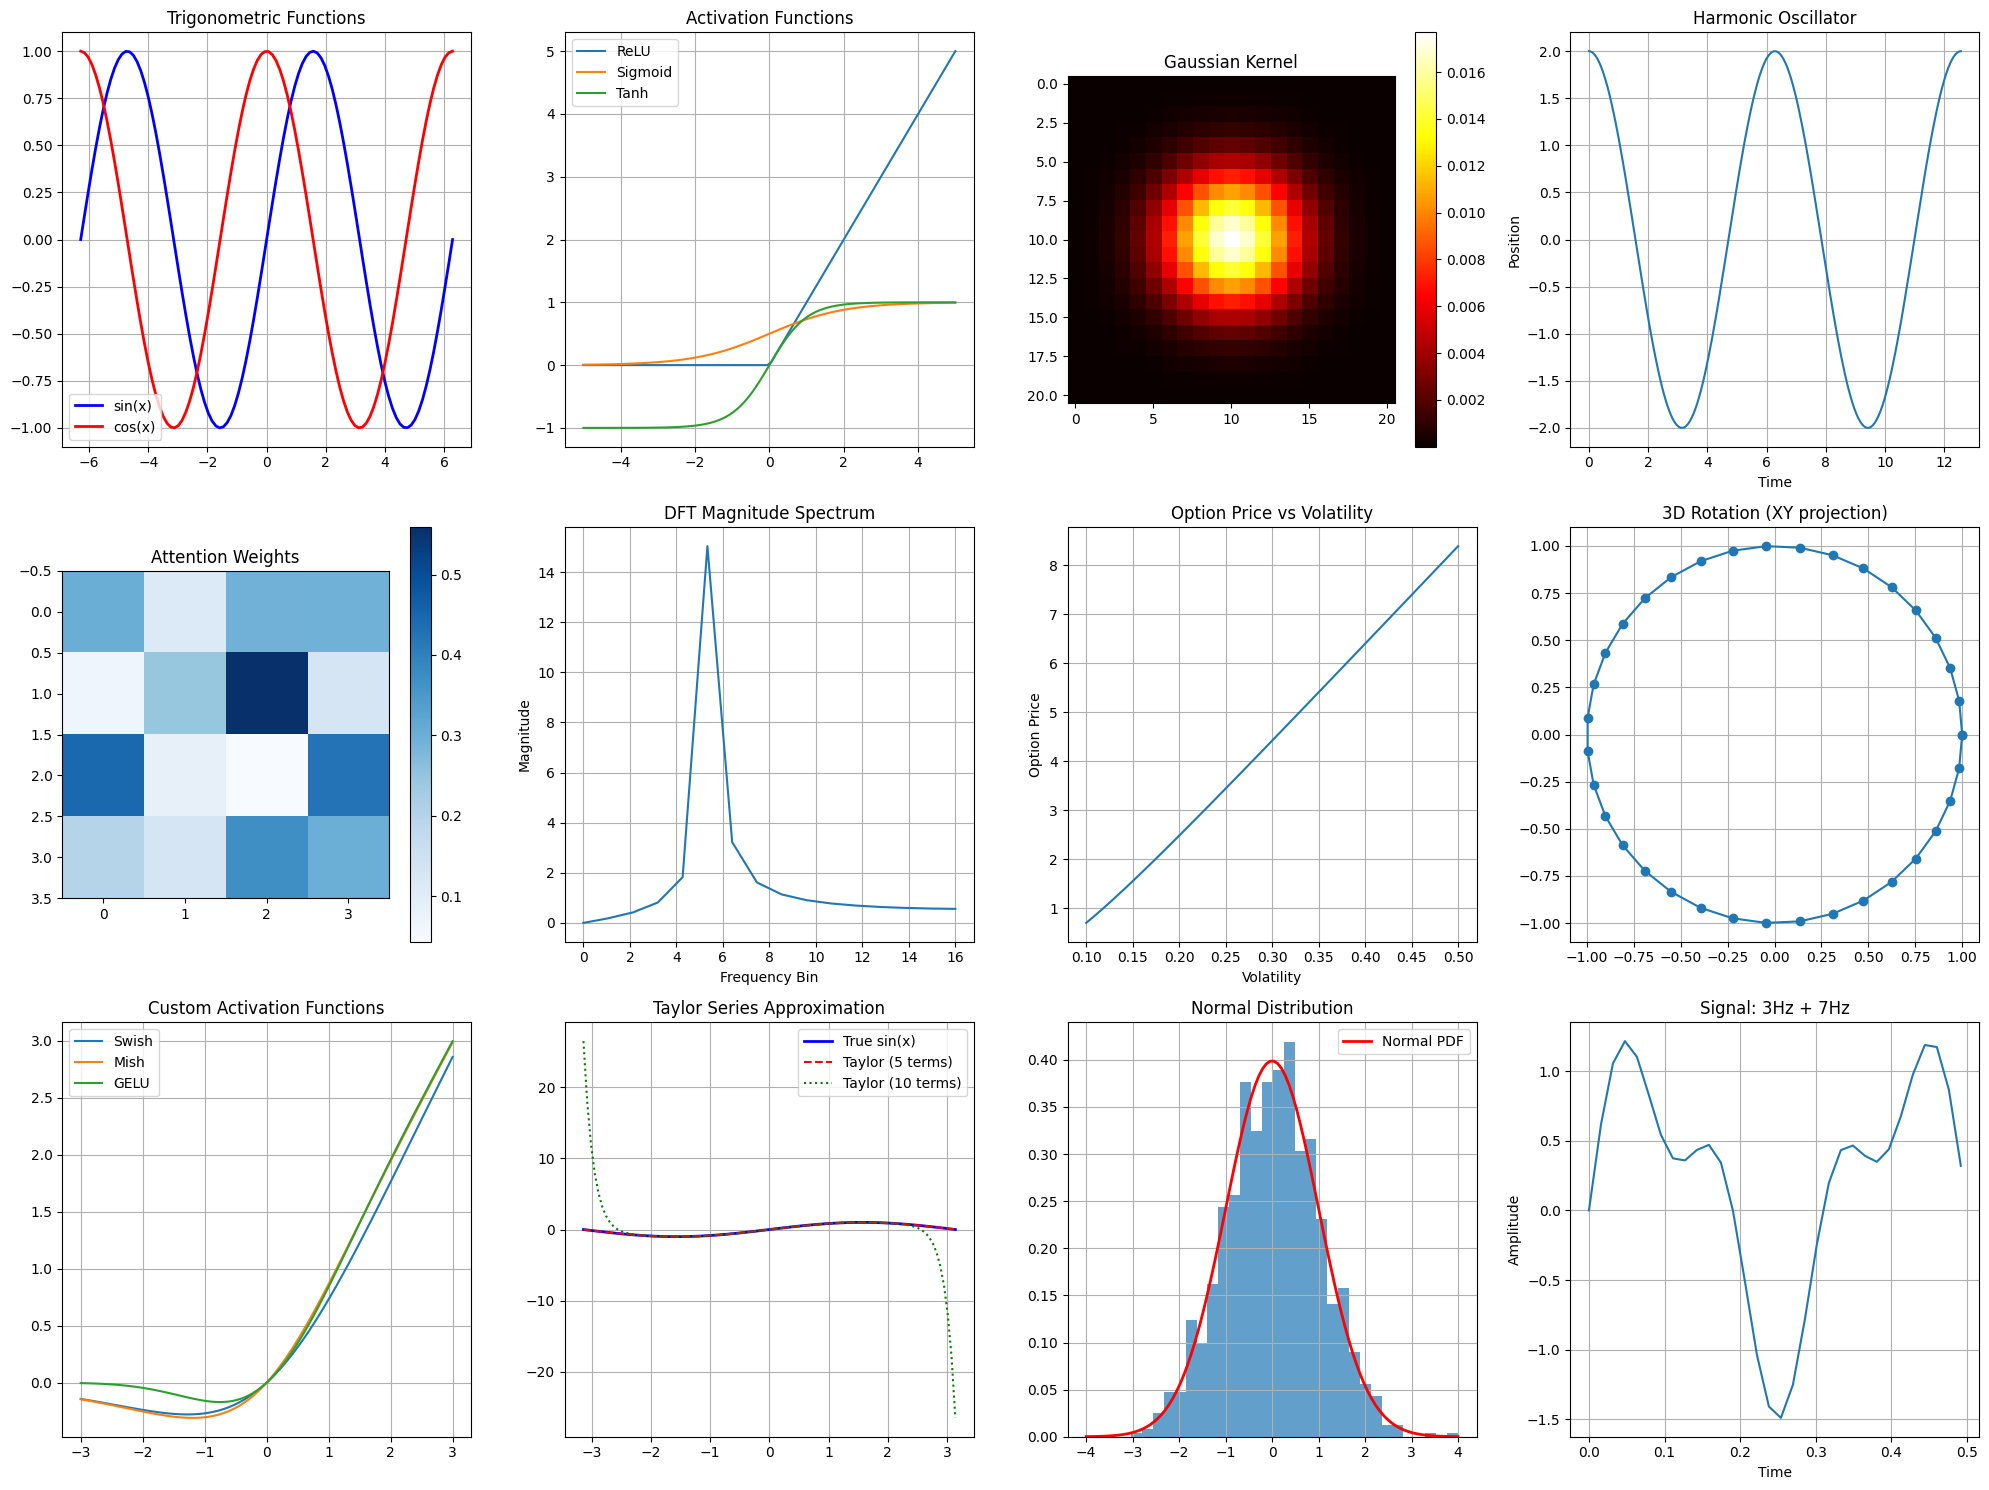

In [20]:
# Real-world applications
print("=== REAL-WORLD APPLICATIONS ===")

# 1. Image Processing - Gaussian Blur
def gaussian_kernel_2d(size, sigma):
    """Create a 2D Gaussian kernel for image blurring"""
    # Create coordinate grids
    coords = tf.linspace(tf.cast(-(size-1)/2, tf.float32), tf.cast((size-1)/2, tf.float32), size)
    x, y = tf.meshgrid(coords, coords)
    
    # Gaussian formula
    kernel = tf.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / tf.reduce_sum(kernel)  # Normalize
    
    return kernel

# Create and visualize Gaussian kernel
kernel_5x5 = gaussian_kernel_2d(5, 1.0)
print("=== IMAGE PROCESSING - GAUSSIAN KERNEL ===")
print("5x5 Gaussian kernel (σ=1.0):")
print(kernel_5x5.numpy())
print()

# 2. Machine Learning - Attention Mechanism (Simplified)
def scaled_dot_product_attention(Q, K, V, mask=None):
    """Simplified attention mechanism from Transformers"""
    # Calculate attention scores
    matmul_qk = tf.matmul(Q, K, transpose_b=True)
    
    # Scale by sqrt(d_k)
    dk = tf.cast(tf.shape(K)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    
    # Apply mask if provided
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    
    # Softmax
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    
    # Apply attention to values
    output = tf.matmul(attention_weights, V)
    
    return output, attention_weights

# Example attention computation
seq_len, d_model = 4, 8
Q = tf.random.normal([1, seq_len, d_model])
K = tf.random.normal([1, seq_len, d_model])
V = tf.random.normal([1, seq_len, d_model])

attention_output, attention_weights = scaled_dot_product_attention(Q, K, V)
print("=== ATTENTION MECHANISM ===")
print(f"Query shape: {Q.shape}")
print(f"Attention weights shape: {attention_weights.shape}")
print("Attention weights:\n", attention_weights[0].numpy())
print()

# 3. Physics Simulation - Harmonic Oscillator
def harmonic_oscillator_solution(t, A, omega, phi):
    """Solution to simple harmonic oscillator: x(t) = A*cos(ωt + φ)"""
    return tf.cast(A, tf.float32) * tf.cos(tf.cast(omega, tf.float32) * t + tf.cast(phi, tf.float32))

def oscillator_energy(A, omega, m=1.0):
    """Total energy of harmonic oscillator: E = (1/2)mω²A²"""
    return 0.5 * m * omega**2 * A**2

# Simulate oscillator
t = tf.linspace(0.0, tf.constant(4.0*np.pi, dtype=tf.float32), 100)
A, omega, phi = 2.0, 1.0, 0.0
position = harmonic_oscillator_solution(t, A, omega, phi)
velocity = -tf.cast(A, tf.float32) * tf.cast(omega, tf.float32) * tf.sin(tf.cast(omega, tf.float32) * t + tf.cast(phi, tf.float32))  # dx/dt

print("=== PHYSICS SIMULATION - HARMONIC OSCILLATOR ===")
print(f"Amplitude: {A}, Frequency: {omega}, Phase: {phi}")
print(f"Total Energy: {oscillator_energy(A, omega)}")
print(f"Max position: {tf.reduce_max(position):.3f}")
print(f"Max velocity: {tf.reduce_max(tf.abs(velocity)):.3f}")
print()

# 4. Finance - Black-Scholes Option Pricing
def black_scholes_call(S, K, T, r, sigma):
    """Black-Scholes call option price"""
    # Calculate d1 and d2
    S, K, T, r, sigma = [tf.cast(x, tf.float32) for x in [S, K, T, r, sigma]]
    d1 = (tf.math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * tf.sqrt(T))
    d2 = d1 - sigma * tf.sqrt(T)
    
    # Standard normal CDF approximation
    def norm_cdf(x):
        return 0.5 * (1 + tf.math.erf(x / tf.sqrt(2.0)))
    
    # Call option price
    call_price = S * norm_cdf(d1) - K * tf.exp(-r * T) * norm_cdf(d2)
    return call_price

# Example option pricing
S = 100.0  # Current stock price
K = 105.0  # Strike price
T = 0.25   # Time to expiration (3 months)
r = 0.05   # Risk-free rate
sigma = 0.2  # Volatility

option_price = black_scholes_call(S, K, T, r, sigma)
print("=== FINANCIAL MODELING - BLACK-SCHOLES ===")
print(f"Stock Price: ${S}")
print(f"Strike Price: ${K}")
print(f"Call Option Price: ${option_price:.2f}")
print()

# 5. Signal Processing - Discrete Fourier Transform (simplified)
def dft_matrix(N):
    """Create DFT matrix"""
    n = tf.range(N, dtype=tf.float32)
    k = tf.reshape(n, [-1, 1])
    
    # e^(-2πi*k*n/N) = cos(-2πkn/N) + i*sin(-2πkn/N)
    angle = -2 * tf.constant(np.pi, dtype=tf.float32) * k * n / tf.cast(N, tf.float32)
    real_part = tf.cos(angle)
    imag_part = tf.sin(angle)
    
    return tf.complex(real_part, imag_part)

def simple_dft(signal):
    """Simple DFT implementation"""
    N = tf.shape(signal)[0]
    W = dft_matrix(N)
    
    # Convert real signal to complex
    complex_signal = tf.complex(signal, tf.zeros_like(signal))
    
    # DFT
    return tf.matmul(W, tf.reshape(complex_signal, [-1, 1]))

# Create a test signal (sine wave)
N = 32
t = tf.linspace(0.0, 1.0, N)
frequency = 5.0
signal = tf.sin(2 * tf.constant(np.pi, dtype=tf.float32) * frequency * t)

# Compute DFT
dft_result = simple_dft(signal)
magnitude = tf.abs(dft_result)

print("=== SIGNAL PROCESSING - DFT ===")
print(f"Signal length: {N}")
print(f"Input frequency: {frequency} Hz")
print(f"DFT magnitude peaks at bins: {tf.argmax(magnitude[:N//2])}")
print()

# 6. Computer Graphics - 3D Rotation Matrix
def rotation_matrix_3d(axis, angle):
    """Create 3D rotation matrix around given axis"""
    # Normalize axis
    axis = axis / tf.norm(axis)
    x, y, z = axis[0], axis[1], axis[2]
    c = tf.cos(angle)
    s = tf.sin(angle)
    
    # Rodrigues' rotation formula
    R = tf.stack([
        [c + x*x*(1-c),     x*y*(1-c) - z*s,  x*z*(1-c) + y*s],
        [y*x*(1-c) + z*s,   c + y*y*(1-c),    y*z*(1-c) - x*s],
        [z*x*(1-c) - y*s,   z*y*(1-c) + x*s,  c + z*z*(1-c)]
    ])
    
    return R

# Example 3D rotation
axis = tf.constant([0.0, 0.0, 1.0])  # Z-axis
angle = tf.constant(np.pi / 4, dtype=tf.float32)  # 45 degrees
R = rotation_matrix_3d(axis, angle)

# Rotate a point
point = tf.constant([1.0, 0.0, 0.0])  # Point on x-axis
rotated_point = tf.matmul(R, tf.reshape(point, [-1, 1]))

print("=== COMPUTER GRAPHICS - 3D ROTATION ===")
print("Rotation axis:", axis.numpy())
print(f"Rotation angle: {(angle * 180 / tf.constant(np.pi, dtype=tf.float32)).numpy():.1f}°")
print("Original point:", point.numpy())
print("Rotated point:", rotated_point.numpy().flatten())
print("Rotation matrix:")
print(R.numpy())

# Create comprehensive visualization
plt.figure(figsize=(20, 15))

# Plot 1: Trigonometric functions
plt.subplot(3, 4, 1)
x = tf.linspace(tf.constant(-2.0*np.pi, dtype=tf.float32), tf.constant(2.0*np.pi, dtype=tf.float32), 100)
plt.plot(x.numpy(), tf.sin(x).numpy(), 'b-', label='sin(x)', linewidth=2)
plt.plot(x.numpy(), tf.cos(x).numpy(), 'r-', label='cos(x)', linewidth=2)
plt.title('Trigonometric Functions')
plt.legend()
plt.grid(True)

# Plot 2: Activation functions
plt.subplot(3, 4, 2)
x = tf.linspace(-5.0, 5.0, 100)
plt.plot(x.numpy(), tf.nn.relu(x).numpy(), label='ReLU')
plt.plot(x.numpy(), tf.nn.sigmoid(x).numpy(), label='Sigmoid')
plt.plot(x.numpy(), tf.nn.tanh(x).numpy(), label='Tanh')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)

# Plot 3: Gaussian kernel
plt.subplot(3, 4, 3)
kernel = gaussian_kernel_2d(21, 3.0)
plt.imshow(kernel.numpy(), cmap='hot')
plt.title('Gaussian Kernel')
plt.colorbar()

# Plot 4: Harmonic oscillator
plt.subplot(3, 4, 4)
t_osc = tf.linspace(0.0, tf.constant(4.0*np.pi, dtype=tf.float32), 200)
pos = harmonic_oscillator_solution(t_osc, 2.0, 1.0, 0.0)
plt.plot(t_osc.numpy(), pos.numpy())
plt.title('Harmonic Oscillator')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)

# Plot 5: Attention weights
plt.subplot(3, 4, 5)
plt.imshow(attention_weights[0].numpy(), cmap='Blues')
plt.title('Attention Weights')
plt.colorbar()

# Plot 6: DFT magnitude
plt.subplot(3, 4, 6)
# Fix dtype mismatch by ensuring consistent types
freq_bins = tf.linspace(0.0, tf.cast(N//2, tf.float32), N//2)
plt.plot(freq_bins.numpy(), magnitude[:N//2].numpy())
plt.title('DFT Magnitude Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot 7: Black-Scholes sensitivity to volatility
plt.subplot(3, 4, 7)
vol_range = tf.linspace(0.1, 0.5, 50)
prices = [black_scholes_call(S, K, T, r, vol) for vol in vol_range]
plt.plot(vol_range.numpy(), prices)
plt.title('Option Price vs Volatility')
plt.xlabel('Volatility')
plt.ylabel('Option Price')
plt.grid(True)

# Plot 8: 3D rotation visualization
plt.subplot(3, 4, 8)
angles = tf.linspace(0.0, tf.constant(2.0*np.pi, dtype=tf.float32), 36)
rotated_points = []
for angle in angles:
    R = rotation_matrix_3d(tf.constant([0.0, 0.0, 1.0]), angle)
    rotated = tf.matmul(R, tf.reshape(tf.constant([1.0, 0.0, 0.0]), [-1, 1]))
    rotated_points.append(rotated.numpy().flatten())

rotated_points = np.array(rotated_points)
plt.plot(rotated_points[:, 0], rotated_points[:, 1], 'o-')
plt.title('3D Rotation (XY projection)')
plt.axis('equal')
plt.grid(True)

# Plot 9: Custom activation functions comparison
plt.subplot(3, 4, 9)
x = tf.linspace(-3.0, 3.0, 100)
plt.plot(x.numpy(), swish(x).numpy(), label='Swish')
plt.plot(x.numpy(), mish(x).numpy(), label='Mish')
plt.plot(x.numpy(), gelu(x).numpy(), label='GELU')
plt.title('Custom Activation Functions')
plt.legend()
plt.grid(True)

# Plot 10: Taylor series approximation
plt.subplot(3, 4, 10)
x = tf.linspace(tf.constant(-np.pi, dtype=tf.float32), tf.constant(np.pi, dtype=tf.float32), 100)
plt.plot(x.numpy(), tf.sin(x).numpy(), 'b-', label='True sin(x)', linewidth=2)
plt.plot(x.numpy(), taylor_sin(x, 5).numpy(), 'r--', label='Taylor (5 terms)')
plt.plot(x.numpy(), taylor_sin(x, 10).numpy(), 'g:', label='Taylor (10 terms)')
plt.title('Taylor Series Approximation')
plt.legend()
plt.grid(True)

# Plot 11: Statistical distribution
plt.subplot(3, 4, 11)
data_hist = tf.random.normal([1000], mean=0, stddev=1)
plt.hist(data_hist.numpy(), bins=30, alpha=0.7, density=True)
x_norm = tf.linspace(-4.0, 4.0, 100)
y_norm = tf.exp(-0.5 * x_norm**2) / tf.sqrt(2 * tf.constant(np.pi, dtype=tf.float32))
plt.plot(x_norm.numpy(), y_norm.numpy(), 'r-', linewidth=2, label='Normal PDF')
plt.title('Normal Distribution')
plt.legend()
plt.grid(True)

# Plot 12: Signal and its DFT
plt.subplot(3, 4, 12)
t_signal = tf.linspace(0.0, 1.0, 64)
signal_complex = tf.sin(2*tf.constant(np.pi, dtype=tf.float32)*3*t_signal) + 0.5*tf.sin(2*tf.constant(np.pi, dtype=tf.float32)*7*t_signal)
plt.subplot(3, 4, 12)
plt.plot(t_signal.numpy()[:32], signal_complex.numpy()[:32])
plt.title('Signal: 3Hz + 7Hz')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
## Summary and Key Takeaways

This comprehensive notebook covered TensorFlow's mathematical capabilities:

### 🔢 **Basic Operations**
- Arithmetic operations with broadcasting
- Element-wise vs matrix operations
- Performance optimization with `@tf.function`

### 📊 **Advanced Functions**
- Trigonometric, logarithmic, and exponential functions
- Statistical computations and data analysis
- Linear algebra and matrix operations

### 🎯 **Machine Learning Applications**
- Activation functions (ReLU, Sigmoid, Tanh, custom)
- Loss functions and optimization
- Attention mechanisms and transformers

### 🔬 **Scientific Computing**
- Numerical integration and differentiation
- Taylor series approximations
- Physics simulations and signal processing

### 💡 **Key Tips**
1. **Use `@tf.function`** for performance-critical operations
2. **Broadcasting** enables efficient tensor operations
3. **Custom functions** can implement domain-specific mathematics
4. **Numerical stability** matters for small/large values
5. **Vectorization** is crucial for GPU acceleration

### 🚀 **Next Steps**
- Experiment with custom mathematical operations
- Apply these functions in your deep learning models
- Explore TensorFlow's automatic differentiation
- Build domain-specific mathematical libraries

**Remember**: TensorFlow's mathematical functions are optimized for both CPU and GPU execution, making them ideal for scientific computing and machine learning applications!